In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression
## The Normal Equation

In [2]:
X = 3 * np.random.rand(200, 1)
y = -5 + 2 * X + np.random.randn(200, 1)

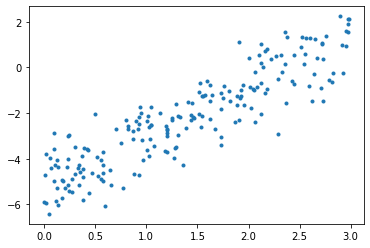

In [3]:
plt.plot(X, y, '.')
plt.show()

In [4]:
X_b = np.c_[np.ones((200, 1)), X]
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
best_theta

array([[-5.14381262],
       [ 2.10983929]])

In [6]:
X_new = np.array([[0], [3]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(best_theta)
y_predict

array([[-5.14381262],
       [ 1.18570524]])

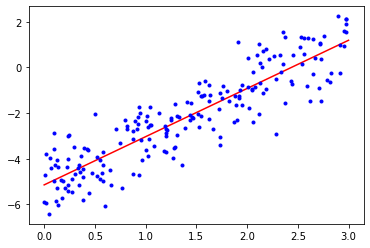

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, '.b')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_

array([-5.14381262])

In [11]:
lin_reg.coef_

array([[2.10983929]])

# Gradient Descent

## Batch Gradient Descent

In [13]:
eta = 0.1 # learning rate
max_iterations = 1000
m = 200 # number of samples

theta = np.random.randn(2,1) # random initialization

for i in range(max_iterations):
    gradient = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

In [14]:
theta

array([[-5.14381262],
       [ 2.10983929]])

## Stochastic GD with learning schedule

In [15]:
n_epoch = 50

In [16]:
def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)

In [17]:
for i in range(n_epoch):
    print(learning_schedule(i), end='\t')
print()

0.1	0.09803921568627451	0.09615384615384616	0.09433962264150944	0.09259259259259259	0.09090909090909091	0.08928571428571429	0.08771929824561403	0.08620689655172414	0.0847457627118644	0.08333333333333333	0.08196721311475409	0.08064516129032258	0.07936507936507936	0.078125	0.07692307692307693	0.07575757575757576	0.07462686567164178	0.07352941176470588	0.07246376811594203	0.07142857142857142	0.07042253521126761	0.06944444444444445	0.0684931506849315	0.06756756756756757	0.06666666666666667	0.06578947368421052	0.06493506493506493	0.0641025641025641	0.06329113924050633	0.0625	0.06172839506172839	0.06097560975609756	0.060240963855421686	0.05952380952380952	0.058823529411764705	0.05813953488372093	0.05747126436781609	0.056818181818181816	0.056179775280898875	0.05555555555555555	0.054945054945054944	0.05434782608695652	0.053763440860215055	0.05319148936170213	0.05263157894736842	0.052083333333333336	0.05154639175257732	0.05102040816326531	0.050505050505050504	


In [18]:
theta = np.random.randn(2, 1)
theta

array([[-0.31275422],
       [-0.0283996 ]])

In [19]:
for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m) # choosing an instance by random (uniform dist)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[-5.14965536],
       [ 2.06805895]])

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-5.12832709]), array([2.11018665]))

# Polynomial Regression

In [24]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.9 * X ** 2 + X + 2 + np.random.randn(m, 1)

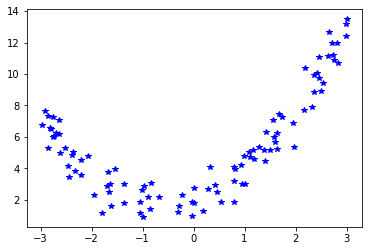

In [25]:
plt.plot(X, y, 'b*')
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [28]:
X[0], X_poly[0]

(array([-0.89555174]), array([-0.89555174,  0.80201291]))

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07996627]), array([[0.98886867, 0.88889721]]))

In [30]:
y_pred = lin_reg.predict(X_poly)

In [31]:
y_pred

array([[ 1.90729026],
       [11.54498441],
       [ 2.09104923],
       [ 1.98370389],
       [ 5.57420563],
       [13.04495841],
       [ 5.53693842],
       [ 9.42211617],
       [ 9.69623341],
       [ 6.28955054],
       [ 3.16550674],
       [ 4.50195028],
       [ 1.8791531 ],
       [ 4.78769527],
       [13.00557815],
       [11.47766318],
       [10.86696045],
       [ 4.248462  ],
       [ 1.87476831],
       [ 5.68836146],
       [ 5.05336433],
       [ 8.50493846],
       [ 2.38960302],
       [ 5.81420404],
       [ 2.05703055],
       [ 4.23793492],
       [ 6.45608877],
       [ 6.30530841],
       [ 6.50342383],
       [ 6.00181049],
       [ 2.84303868],
       [ 6.75390076],
       [ 3.92158766],
       [ 2.42541617],
       [ 2.93387612],
       [ 2.68038944],
       [ 7.51154927],
       [ 5.87399722],
       [ 2.3056578 ],
       [ 5.22260628],
       [ 2.04702251],
       [ 1.86026273],
       [12.93824268],
       [10.07677742],
       [ 4.43222522],
       [ 1

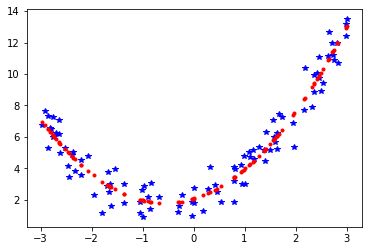

In [34]:
plt.plot(X, y, 'b*')
plt.plot(X, y_pred.ravel(), 'r.')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [44]:
def plot_learning_curve(model, X, y, test_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size)
    
    train_err = []
    val_err = []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:m], y_train_pred[:m]))
        val_err.append(mean_squared_error(y_val, y_val_pred))
    
    plt.plot(np.sqrt(train_err), 'r-+', label='train')
    plt.plot(np.sqrt(val_err), 'b-', label='val')
    plt.legend()
    plt.show()

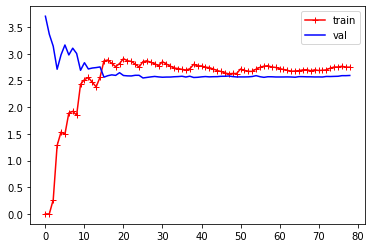

In [45]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

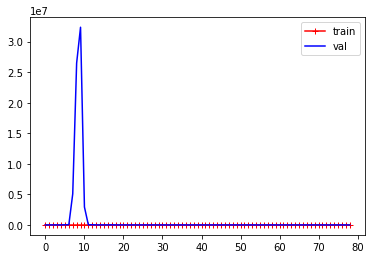

In [49]:
plot_learning_curve(poly_reg, X, y)